In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns 

import joblib

In [2]:
df = pd.read_csv("Data/train.csv")
df.head()

,body_type,sex,diet,shower_freq,heat_energy_source,transport,social,monthly_grocery_bill,air_travel_freq,vehicle_km,waste_bag_size,waste_bag_count,tv_daily_time,monthly_clothes,internet_daily_time,energy_eff,recycling,cooking_with,CE
0,2,0,1,0,0,1,1,230,0,210,1,4,21.444701,26,3.927957,0,11,12,7.713338
1,1,0,3,1,2,2,1,114,2,9,0,3,15.896360,38,22.948439,0,11,10,7.545390
2,2,1,0,2,3,0,0,138,1,2472,3,1,6.250881,47,5.005541,1,11,9,7.861342
3,2,1,0,3,3,2,2,157,2,74,2,3,4.843126,5,20.098744,1,0,3,6.979145
4,1,0,3,0,0,0,1,266,3,8457,1,1,22.520759,5,0.562809,2,13,13,8.464425


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             10000 non-null  int64  
 1   sex                   10000 non-null  int64  
 2   diet                  10000 non-null  int64  
 3   shower_freq           10000 non-null  int64  
 4   heat_energy_source    10000 non-null  int64  
 5   transport             10000 non-null  int64  
 6   social                10000 non-null  int64  
 7   monthly_grocery_bill  10000 non-null  int64  
 8   air_travel_freq       10000 non-null  int64  
 9   vehicle_km            10000 non-null  int64  
 10  waste_bag_size        10000 non-null  int64  
 11  waste_bag_count       10000 non-null  int64  
 12  tv_daily_time         10000 non-null  float64
 13  monthly_clothes       10000 non-null  int64  
 14  internet_daily_time   10000 non-null  float64
 15  energy_eff          

In [4]:
df.describe()

,body_type,sex,diet,shower_freq,heat_energy_source,transport,social,monthly_grocery_bill,air_travel_freq,vehicle_km,waste_bag_size,waste_bag_count,tv_daily_time,monthly_clothes,internet_daily_time,energy_eff,recycling,cooking_with,CE
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.509400,0.499300,1.491900,1.493700,1.486500,1.014800,0.98690,173.875200,1.503300,2031.485900,1.502400,4.024600,11.902965,25.109000,11.919252,1.009500,7.502900,7.463100,7.632020
std,1.119213,0.500025,1.113489,1.123604,1.116755,0.818809,0.81731,72.234018,1.123795,2769.715597,1.120321,1.990375,6.911459,14.698725,6.964291,0.808502,4.645831,4.609139,0.439683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,50.000000,0.000000,0.000000,0.000000,1.000000,0.002637,0.000000,0.013301,0.000000,0.000000,0.000000,5.723585
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,111.000000,0.000000,69.000000,0.750000,2.000000,5.896428,13.000000,5.784008,0.000000,3.000000,3.000000,7.338238
50%,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,173.000000,2.000000,823.000000,1.000000,4.000000,11.856055,25.000000,11.924586,1.000000,8.000000,8.000000,7.640123
75%,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.00000,237.000000,3.000000,2516.750000,3.000000,6.000000,17.820887,38.000000,17.973735,2.000000,12.000000,11.000000,7.925880
max,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.00000,299.000000,3.000000,9999.000000,3.000000,7.000000,23.999456,50.000000,23.990622,2.000000,15.000000,15.000000,9.033245


<Axes: ylabel='CE'>

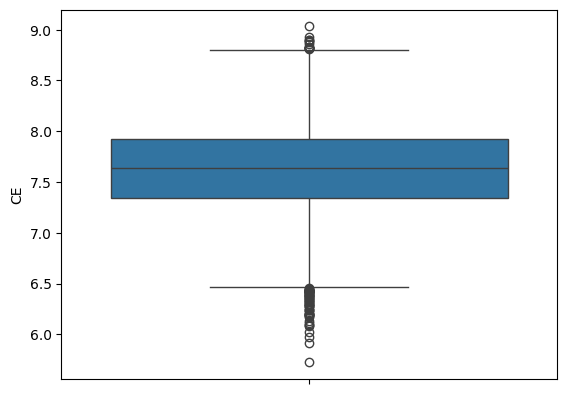

In [5]:
sns.boxplot(df["CE"])

<Axes: >

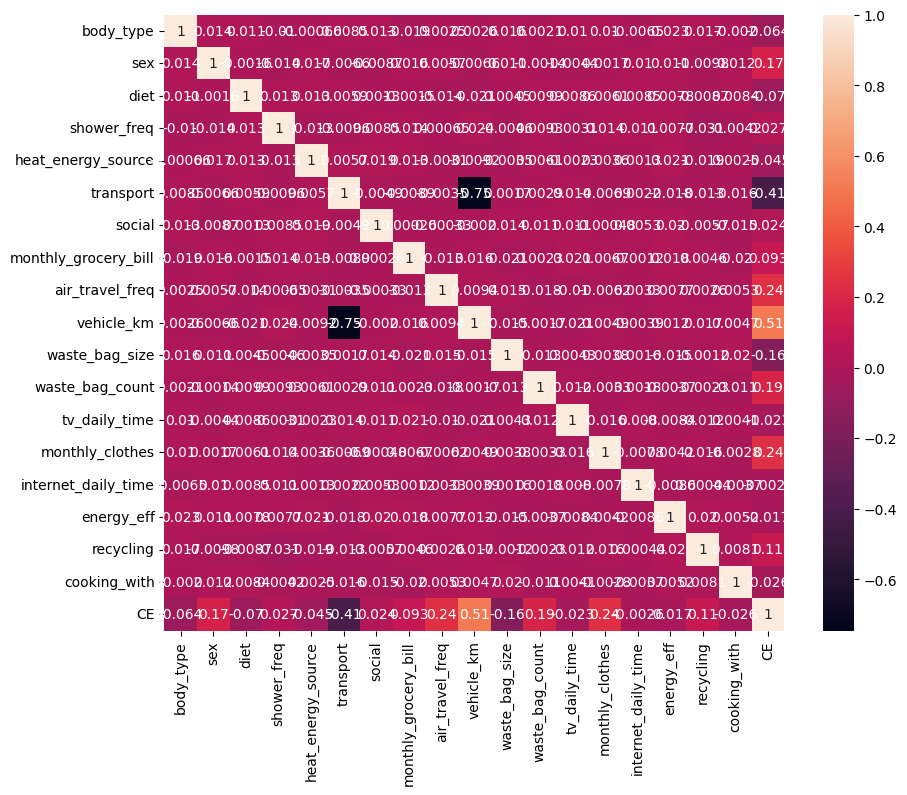

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

### 2. Data Loader

In [7]:
X = df.drop(columns="CE")
y = df["CE"]

X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [8]:
class CustomDataLoader:
    def __init__(self, X_data, y_data):
        self.X_data = torch.tensor(X_data, dtype=torch.float32)
        self.y_data = torch.tensor(y_data, dtype=torch.float32) 

    def __getitem__(self, idx):
        return self.X_data[idx], self.y_data[idx]
    
    def __len__(self):
        return len(self.X_data)


train_loader = CustomDataLoader(X_train, y_train) 
val_loader = CustomDataLoader(X_val, y_val)
test_loader = CustomDataLoader(X_test, y_test)

train_loader = DataLoader(train_loader, batch_size=64, shuffle=True)
val_loader = DataLoader(val_loader, batch_size=64, shuffle=False)
test_loader = DataLoader(test_loader, batch_size=1, shuffle=False) 

### 3. Model

In [16]:
class Model(nn.Module):
    def __init__(self, in_features, out_features, hidden_layer_sizes):
        super().__init__()
        layers = []
        # Adding input layer to the first hidden layer
        layers.append(nn.Linear(in_features, hidden_layer_sizes[0]))
        layers.append(nn.SiLU())  # Adding ReLU activation function
        
        # Adding hidden layers
        for i in range(len(hidden_layer_sizes) - 1):
            layers.append(nn.Linear(hidden_layer_sizes[i], hidden_layer_sizes[i+1]))
            layers.append(nn.SiLU())
            layers.append(nn.Dropout(0.3))
        
        # Adding output layer
        layers.append(nn.Linear(hidden_layer_sizes[-1], out_features))
        # No activation function
        
        # Combining all layers into a Sequential module
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.model(x)



# Define input and output sizes
in_features = X.shape[1]  
out_features = 1 

# Define list of hidden layer sizes
hidden_layer_sizes = [64, 32, 16]  

model = Model(in_features, out_features, hidden_layer_sizes)

### 4. Loss Function and Optimizer

In [10]:
criterion = nn.HuberLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

### 5. Traning the model

In [11]:
train_losses = []
val_losses = []

# Training loop
max_epochs = 250
for epoch in range(1, max_epochs):
    epoch += 1
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)  
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    if epoch % 25 == 0:
        print(f'Epoch {epoch}/{max_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')


Epoch 25/250, Train Loss: 0.4409, Validation Loss: 0.0498
Epoch 50/250, Train Loss: 0.2535, Validation Loss: 0.0240
Epoch 75/250, Train Loss: 0.1153, Validation Loss: 0.0195
Epoch 100/250, Train Loss: 0.0395, Validation Loss: 0.0167
Epoch 125/250, Train Loss: 0.0236, Validation Loss: 0.0170
Epoch 150/250, Train Loss: 0.0214, Validation Loss: 0.0166
Epoch 175/250, Train Loss: 0.0200, Validation Loss: 0.0165
Epoch 200/250, Train Loss: 0.0187, Validation Loss: 0.0163
Epoch 225/250, Train Loss: 0.0186, Validation Loss: 0.0163
Epoch 250/250, Train Loss: 0.0181, Validation Loss: 0.0160


In [12]:
torch.save(model.state_dict(), 'model.pth')

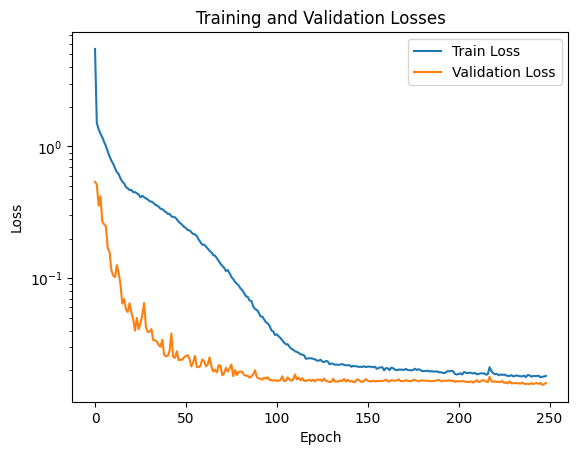

In [13]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

### 6. Testing the model

In [14]:
test_preds = []
model.eval()
with torch.no_grad():
    for inputs, _ in test_loader:
        y_pred = model(inputs)
        test_preds.append(y_pred.squeeze().tolist())

R2 = r2_score(y_test, test_preds)
print(f"Test R2: {R2*100}")

Test R2: 80.60613744951657


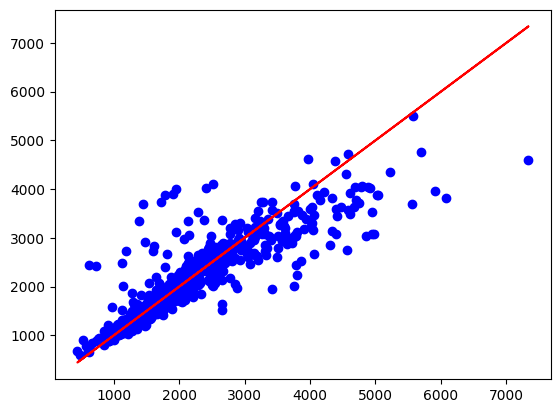

In [15]:
plt.plot(np.exp(y_test), np.exp(y_test), color="red")
plt.scatter(np.exp(y_test), np.exp(test_preds), color="blue")